<a href="https://colab.research.google.com/github/Harshi07-c/HEALTH-STATUS-PREDICTION-EX-AI_/blob/main/MODEL_TRAINING%2C_EVALUATION%2C_EX_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [90]:
df = pd.read_csv("/content/cleaned_dataset2.csv")
display(df.head())

General_Health  Checkup  Exercise  Heart_Disease  Skin_Cancer  \
0               1        2         0              0            0   
1               1        4         1              1            0   
2               0        2         1              0            0   
3               0        4         1              0            0   
4               0        2         1              0            0   

   Other_Cancer  Depression  Diabetes  Arthritis  Sex  Age_Category  \
0             0           0         0          1    0            10   
1             0           0         2          0    1            11   
2             0           0         0          0    0            10   
3             0           0         0          1    1            10   
4             0           0         0          0    0             8   

   Height_(cm)  Weight_(kg)    BMI  Smoking_History  Alcohol_Consumption  \
0          150        32.66  14.54                1                    0   
1          180        93.44  28.73                0                    0   
2          152        52.16  22.46                0                    0   
3          191       112.49  31.00                0                    0   
4          168        60.78  21.63                0                    0   

   Fruit_Consumption  Green_Vegetables_Consumption  FriedPotato_Consumption  
0                 30                            16                       12  
1                 30                            30                        8  
2                 30                             4                        0  
3                 30                            10                       15  
4                 60                            30                        2

In [91]:
y = df['General_Health']
X = df.drop('General_Health', axis=1)


In [94]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [95]:
X_scaled

array([[-1.27399787e+00, -2.02763122e+00, -2.74572351e-01, ...,
        -9.89816416e-02, -2.46223588e-04,  1.95035748e+00],
       [ 5.26824521e-01,  4.93186330e-01,  3.64202731e+00, ...,
        -9.89816416e-02,  1.03059892e+00,  9.41359268e-01],
       [-1.27399787e+00,  4.93186330e-01, -2.74572351e-01, ...,
        -9.89816416e-02, -8.83827777e-01, -1.07663716e+00],
       ...,
       [-3.73586674e-01, -2.02763122e+00, -2.74572351e-01, ...,
        -7.87047416e-01, -2.94773408e-01, -6.76389454e-02],
       [-3.73586674e-01,  4.93186330e-01, -2.74572351e-01, ...,
        -9.89816416e-02, -1.17835496e+00, -1.07663716e+00],
       [ 5.26824521e-01,  4.93186330e-01, -2.74572351e-01, ...,
        -1.05462855e+00, -2.94773408e-01, -8.24387605e-01]])

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0)


In [97]:
# Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=0)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {dt_accuracy}")



Decision Tree Accuracy: 0.8781828990389379


In [98]:
# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {rf_accuracy}")

Random Forest Accuracy: 0.9221737838105618


In [99]:
from sklearn.linear_model import LogisticRegression

# Create the model
logistic_regression_model = LogisticRegression(multi_class='multinomial', solver='lbfgs')

# Fit the model
logistic_regression_model.fit(X_train, y_train)

# Evaluate the model
accuracy = logistic_regression_model.score(X_test, y_test)
print(f'Multinomial Logistic Regression Accuracy: {accuracy}')


Multinomial Logistic Regression Accuracy: 0.9197958981472307


In [100]:
from xgboost import XGBClassifier

# Create the model
xgb_model = XGBClassifier()

# Fit the model
xgb_model.fit(X_train, y_train)

# Evaluate the model
accuracy = xgb_model.score(X_test, y_test)
print(f'XGBoost Accuracy: {accuracy}')


XGBoost Accuracy: 0.9207371445556326


In [101]:
import lightgbm as lgb

# Create the model
lgb_model = lgb.LGBMClassifier()

# Fit the model
lgb_model.fit(X_train, y_train)

# Evaluate the model
accuracy = lgb_model.score(X_test, y_test)
print(f'LightGBM Accuracy: {accuracy}')


[LightGBM] [Info] Number of positive: 7987, number of negative: 39112
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007053 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 724
[LightGBM] [Info] Number of data points in the train set: 47099, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.169579 -> initscore=-1.588614
[LightGBM] [Info] Start training from score -1.588614
LightGBM Accuracy: 0.9242048944813237


In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.7 MB/s eta 0:00:00


In [102]:
from catboost import CatBoostClassifier

# Create the model
catboost_model = CatBoostClassifier()

# Fit the model
catboost_model.fit(X_train, y_train)

# Evaluate the model
accuracy = catboost_model.score(X_test, y_test)
print(f'CatBoost Accuracy: {accuracy}')


Learning rate set to 0.053372
0:	learn: 0.6213392	total: 11ms	remaining: 11s
1:	learn: 0.5620632	total: 22.1ms	remaining: 11s
2:	learn: 0.5082969	total: 33.1ms	remaining: 11s
3:	learn: 0.4675519	total: 43.9ms	remaining: 10.9s
4:	learn: 0.4290270	total: 55ms	remaining: 10.9s
5:	learn: 0.3970504	total: 65.6ms	remaining: 10.9s
6:	learn: 0.3703696	total: 76.4ms	remaining: 10.8s
7:	learn: 0.3483918	total: 86.9ms	remaining: 10.8s
8:	learn: 0.3318073	total: 97.7ms	remaining: 10.8s
9:	learn: 0.3152405	total: 109ms	remaining: 10.8s
10:	learn: 0.3028023	total: 120ms	remaining: 10.8s
11:	learn: 0.2903864	total: 131ms	remaining: 10.8s
12:	learn: 0.2803256	total: 142ms	remaining: 10.8s
13:	learn: 0.2712406	total: 154ms	remaining: 10.8s
14:	learn: 0.2655738	total: 168ms	remaining: 11s
15:	learn: 0.2605158	total: 180ms	remaining: 11.1s
16:	learn: 0.2541789	total: 192ms	remaining: 11.1s
17:	learn: 0.2488053	total: 207ms	remaining: 11.3s
18:	learn: 0.2440089	total: 220ms	remaining: 11.3s
19:	learn: 0.2

#HYPER PARAMETER OPTIMIZATION

In [103]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grids for the models
dt_param_grid = {'max_depth': [3, 5, 7, 9]}

rf_param_grid = {'n_estimators': [100, 200, 300],
                 'max_depth': [3, 5, 7]}

logistic_regression_param_grid = {'C': [0.1, 1, 10]}

xgb_param_grid = {'max_depth': [3, 5, 7],
                  'n_estimators': [100, 200, 300]}

lgb_param_grid = {'max_depth': [3, 5, 7],
                  'n_estimators': [100, 200, 300]}

catboost_param_grid = {'iterations': [100, 200, 300],
                       'learning_rate': [0.03, 0.1, 0.3]}


# Perform grid search for each model

In [104]:
dt_grid_search = GridSearchCV(dt_model, dt_param_grid)
dt_grid_search.fit(X_train, y_train)
print(f"Best parameters for Decision Tree: {dt_grid_search.best_params_}")

Best parameters for Decision Tree: {'max_depth': 7}


In [105]:
rf_grid_search = GridSearchCV(rf_model, rf_param_grid)
rf_grid_search.fit(X_train, y_train)
print(f"Best parameters for Random Forest: {rf_grid_search.best_params_}")

Best parameters for Random Forest: {'max_depth': 7, 'n_estimators': 300}


In [106]:
logistic_regression_grid_search = GridSearchCV(logistic_regression_model, logistic_regression_param_grid)
logistic_regression_grid_search.fit(X_train, y_train)
print(f"Best parameters for Logistic Regression: {logistic_regression_grid_search.best_params_}")


Best parameters for Logistic Regression: {'C': 1}


In [107]:
lgb_grid_search = GridSearchCV(lgb_model, lgb_param_grid)
lgb_grid_search.fit(X_train, y_train)
print(f"Best parameters for LightGBM: {lgb_grid_search.best_params_}")

[LightGBM] [Info] Number of positive: 6390, number of negative: 31289
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007740 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 37679, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.169590 -> initscore=-1.588532
[LightGBM] [Info] Start training from score -1.588532
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 6390, number of negative: 31

In [108]:
xgb_grid_search = GridSearchCV(xgb_model, xgb_param_grid)
xgb_grid_search.fit(X_train, y_train)
print(f"Best parameters for XGBoost: {xgb_grid_search.best_params_}")

Best parameters for XGBoost: {'max_depth': 3, 'n_estimators': 100}


In [109]:
catboost_grid_search = GridSearchCV(catboost_model, catboost_param_grid)
catboost_grid_search.fit(X_train, y_train)
print(f"Best parameters for CatBoost: {catboost_grid_search.best_params_}")

Streaming output truncated to the last 5000 lines.
101:	learn: 0.1545411	total: 1.02s	remaining: 977ms
102:	learn: 0.1543585	total: 1.02s	remaining: 966ms
103:	learn: 0.1541344	total: 1.04s	remaining: 963ms
104:	learn: 0.1540536	total: 1.05s	remaining: 952ms
105:	learn: 0.1539298	total: 1.06s	remaining: 941ms
106:	learn: 0.1536515	total: 1.07s	remaining: 930ms
107:	learn: 0.1534120	total: 1.08s	remaining: 920ms
108:	learn: 0.1531898	total: 1.09s	remaining: 910ms
109:	learn: 0.1527883	total: 1.1s	remaining: 899ms
110:	learn: 0.1526370	total: 1.11s	remaining: 888ms
111:	learn: 0.1524596	total: 1.12s	remaining: 878ms
112:	learn: 0.1522348	total: 1.13s	remaining: 869ms
113:	learn: 0.1520887	total: 1.14s	remaining: 861ms
114:	learn: 0.1518426	total: 1.16s	remaining: 859ms
115:	learn: 0.1515050	total: 1.17s	remaining: 849ms
116:	learn: 0.1512598	total: 1.18s	remaining: 839ms
117:	learn: 0.1509704	total: 1.19s	remaining: 829ms
118:	learn: 0.1506853	total: 1.2s	remaining: 819ms
119:	learn: 0.1

In [110]:
# Initialize models with best parameters
best_dt_model = DecisionTreeClassifier(max_depth=dt_grid_search.best_params_['max_depth'], random_state=0)

best_rf_model = RandomForestClassifier(n_estimators=rf_grid_search.best_params_['n_estimators'],
                                      max_depth=rf_grid_search.best_params_['max_depth'], random_state=0)

best_logistic_regression_model = LogisticRegression(multi_class='multinomial', solver='lbfgs',
                                                   C=logistic_regression_grid_search.best_params_['C'])

best_xgb_model = XGBClassifier(max_depth=xgb_grid_search.best_params_['max_depth'],
                               n_estimators=xgb_grid_search.best_params_['n_estimators'])

best_lgb_model = lgb.LGBMClassifier(max_depth=lgb_grid_search.best_params_['max_depth'],
                                   n_estimators=lgb_grid_search.best_params_['n_estimators'])

best_catboost_model = CatBoostClassifier(iterations=catboost_grid_search.best_params_['iterations'],
                                         learning_rate=catboost_grid_search.best_params_['learning_rate'])





In [111]:
best_logistic_regression_model.fit(X_train, y_train)
best_logistic_regression_accuracy = best_logistic_regression_model.score(X_test, y_test)
print(f"Best Multinomial Logistic Regression Accuracy: {best_logistic_regression_accuracy}")

Best Multinomial Logistic Regression Accuracy: 0.9197958981472307


In [112]:
# Fit the models again with the best parameters
best_dt_model.fit(X_train, y_train)
best_dt_accuracy = best_dt_model.score(X_test, y_test)
# Print the accuracies
print(f"Best Decision Tree Accuracy: {best_dt_accuracy}")

Best Decision Tree Accuracy: 0.9130585554344596


In [113]:
best_rf_model.fit(X_train, y_train)
best_rf_accuracy = best_rf_model.score(X_test, y_test)
print(f"Best Random Forest Accuracy: {best_rf_accuracy}")

Best Random Forest Accuracy: 0.9194491231546617


In [114]:
best_xgb_model.fit(X_train, y_train)
best_xgb_accuracy = best_xgb_model.score(X_test, y_test)
print(f"Best XGBoost Accuracy: {best_xgb_accuracy}")

Best XGBoost Accuracy: 0.9247498266125037


In [115]:
best_lgb_model.fit(X_train, y_train)
best_lgb_accuracy = best_lgb_model.score(X_test, y_test)
print(f"Best LightGBM Accuracy: {best_lgb_accuracy}")

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 7987, number of negative: 39112
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006672 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 724
[LightGBM] [Info] Number of data points in the train set: 47099, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.169579 -> initscore=-1.588614
[LightGBM] [Info] Start training from score -1.588614
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

In [116]:
best_catboost_model.fit(X_train, y_train)
best_catboost_accuracy = best_catboost_model.score(X_test, y_test)
print(f"Best CatBoost Accuracy: {best_catboost_accuracy}")


0:	learn: 0.5651974	total: 11.5ms	remaining: 2.28s
1:	learn: 0.4752985	total: 22.7ms	remaining: 2.25s
2:	learn: 0.4051578	total: 33.9ms	remaining: 2.22s
3:	learn: 0.3602808	total: 44.8ms	remaining: 2.2s
4:	learn: 0.3229366	total: 55.7ms	remaining: 2.17s
5:	learn: 0.2965490	total: 67.3ms	remaining: 2.18s
6:	learn: 0.2784539	total: 79ms	remaining: 2.18s
7:	learn: 0.2637384	total: 90.9ms	remaining: 2.18s
8:	learn: 0.2523486	total: 103ms	remaining: 2.18s
9:	learn: 0.2427371	total: 116ms	remaining: 2.2s
10:	learn: 0.2364256	total: 127ms	remaining: 2.18s
11:	learn: 0.2301280	total: 138ms	remaining: 2.17s
12:	learn: 0.2250324	total: 150ms	remaining: 2.16s
13:	learn: 0.2211125	total: 162ms	remaining: 2.16s
14:	learn: 0.2188054	total: 173ms	remaining: 2.14s
15:	learn: 0.2167175	total: 185ms	remaining: 2.13s
16:	learn: 0.2146229	total: 197ms	remaining: 2.12s
17:	learn: 0.2127015	total: 208ms	remaining: 2.1s
18:	learn: 0.2109641	total: 226ms	remaining: 2.16s
19:	learn: 0.2090741	total: 239ms	rema

#COMPARISON AFTER HYPERPARAMETER OPTIMIZATION

In [117]:
from tabulate import tabulate

data = [
    ["Decision Tree", dt_accuracy, best_dt_accuracy],
    ["Random Forest", rf_accuracy, best_rf_accuracy],
    ["Multinomial Logistic Regression", accuracy, best_logistic_regression_accuracy],
    ["XGBoost", accuracy, best_xgb_accuracy],
    ["LightGBM", accuracy, best_lgb_accuracy],
    ["CatBoost", accuracy, best_catboost_accuracy]
]

print(tabulate(data, headers=["Model", "Before Hyperparameter Optimization", "After Hyperparameter Optimization"], tablefmt="pretty"))


+---------------------------------+------------------------------------+-----------------------------------+
|              Model              | Before Hyperparameter Optimization | After Hyperparameter Optimization |
+---------------------------------+------------------------------------+-----------------------------------+
|          Decision Tree          |         0.8781828990389379         |        0.9130585554344596         |
|          Random Forest          |         0.9221737838105618         |        0.9194491231546617         |
| Multinomial Logistic Regression |         0.9244030516199346         |        0.9197958981472307         |
|             XGBoost             |         0.9244030516199346         |        0.9247498266125037         |
|            LightGBM             |         0.9244030516199346         |        0.9255424551669474         |
|            CatBoost             |         0.9244030516199346         |        0.9267313979986129         |
+------------------

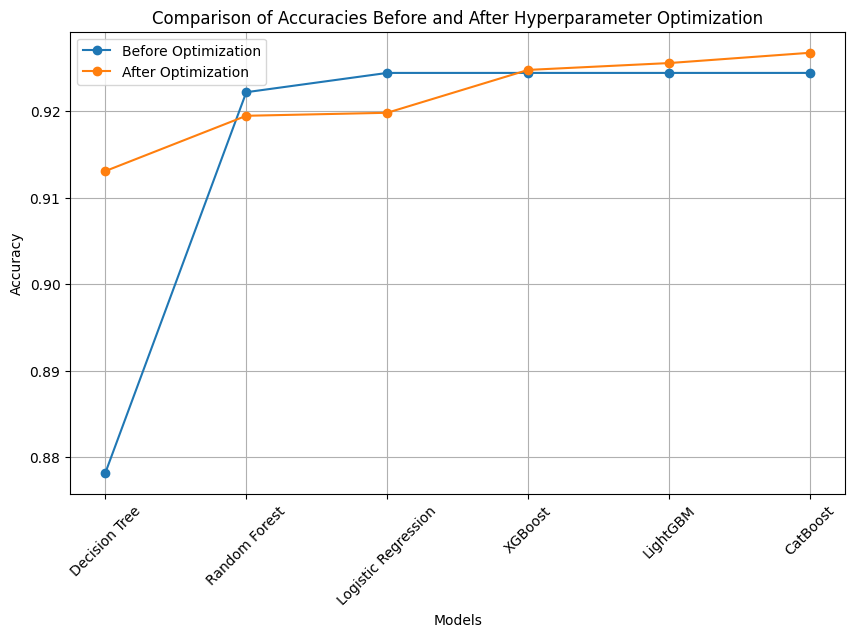

In [118]:
import matplotlib.pyplot as plt

models = ["Decision Tree", "Random Forest", "Logistic Regression", "XGBoost", "LightGBM", "CatBoost"]
before_optimization = [dt_accuracy, rf_accuracy, accuracy, accuracy, accuracy, accuracy]
after_optimization = [best_dt_accuracy, best_rf_accuracy, best_logistic_regression_accuracy, best_xgb_accuracy, best_lgb_accuracy, best_catboost_accuracy]

x = range(len(models))

plt.figure(figsize=(10, 6))
plt.plot(models, before_optimization, marker='o', label="Before Optimization")
plt.plot(models, after_optimization, marker='o', label="After Optimization")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Comparison of Accuracies Before and After Hyperparameter Optimization")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()


#EVALUATION

Decision Tree Confusion Matrix:


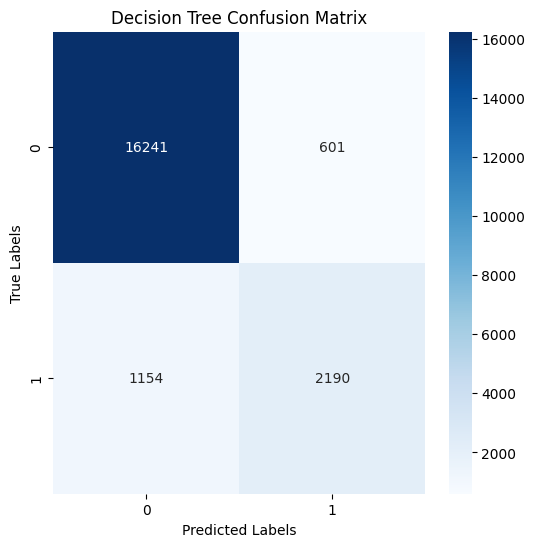

XGBoost Confusion Matrix:


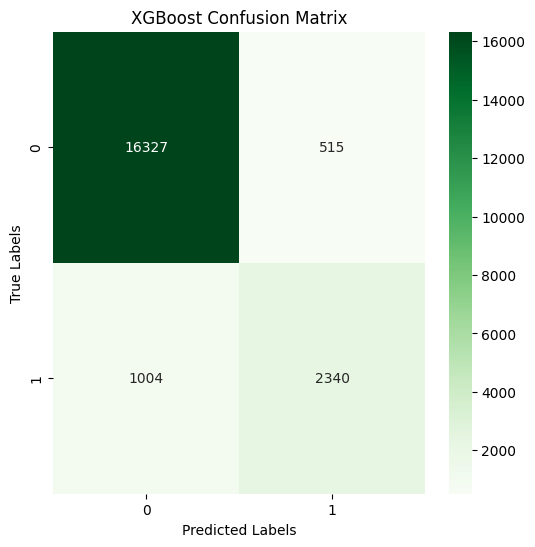

CatBoost Confusion Matrix:


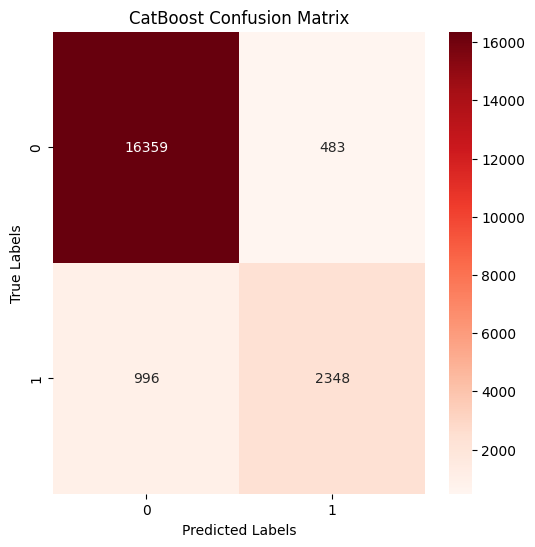

In [119]:
from sklearn.metrics import confusion_matrix, classification_report

# Calculate and print the confusion matrix for each model after hyperparameter optimization
print("Decision Tree Confusion Matrix:")
dt_conf_matrix = confusion_matrix(y_test, best_dt_model.predict(X_test))

# Visualize the confusion matrix using seaborn
plt.figure(figsize=(6, 6))
sns.heatmap(dt_conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Decision Tree Confusion Matrix")
plt.show()

print("XGBoost Confusion Matrix:")
xgb_conf_matrix = confusion_matrix(y_test, best_xgb_model.predict(X_test))


# Visualize the confusion matrix using seaborn
plt.figure(figsize=(6, 6))
sns.heatmap(xgb_conf_matrix, annot=True, fmt="d", cmap="Greens")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("XGBoost Confusion Matrix")
plt.show()


print("CatBoost Confusion Matrix:")
catboost_conf_matrix = confusion_matrix(y_test, best_catboost_model.predict(X_test))


# Visualize the confusion matrix using seaborn
plt.figure(figsize=(6, 6))
sns.heatmap(catboost_conf_matrix, annot=True, fmt="d", cmap="Reds")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("CatBoost Confusion Matrix")
plt.show()


In [120]:
# Calculate and print the classification report for each model after hyperparameter optimization
print("Decision Tree Classification Report:")
print(classification_report(y_test, best_dt_model.predict(X_test)))
print("")


print("XGBoost Classification Report:")
print(classification_report(y_test, best_xgb_model.predict(X_test)))
print("")


print("CatBoost Classification Report:")
print(classification_report(y_test, best_catboost_model.predict(X_test)))
print("")

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95     16842
           1       0.78      0.65      0.71      3344

    accuracy                           0.91     20186
   macro avg       0.86      0.81      0.83     20186
weighted avg       0.91      0.91      0.91     20186


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96     16842
           1       0.82      0.70      0.75      3344

    accuracy                           0.92     20186
   macro avg       0.88      0.83      0.86     20186
weighted avg       0.92      0.92      0.92     20186


CatBoost Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96     16842
           1       0.83      0.70      0.76      3344

    accuracy                           0.93     20186
   macro avg       0.89   

EXPLAINABLE AI USING SHAP

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 7.9 MB/s eta 0:00:00


In [121]:
import shap

In [122]:
# convert X_test to DataFrame
X_test_df = pd.DataFrame(X_test, columns=X.columns)

XGBOOST

In [123]:
# compute SHAP values
explainer_xgb = shap.TreeExplainer(xgb_model)
shap_values_xgb = explainer_xgb.shap_values(X_test_df)


[11:20:05] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


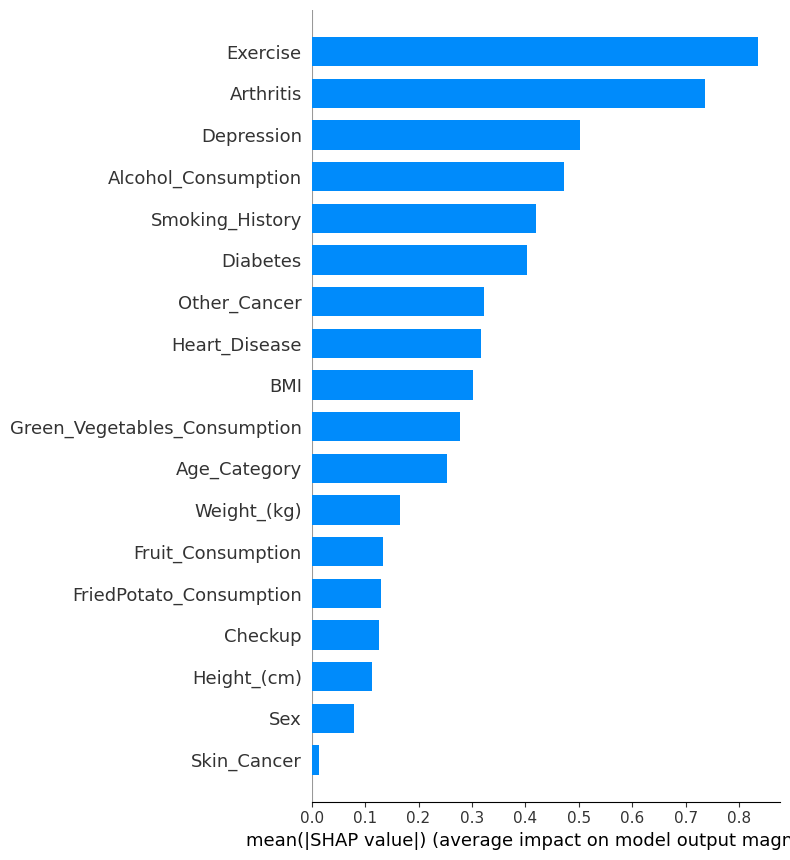

In [124]:
shap.summary_plot(shap_values_xgb, X_test_df, plot_type="bar", feature_names=X.columns)


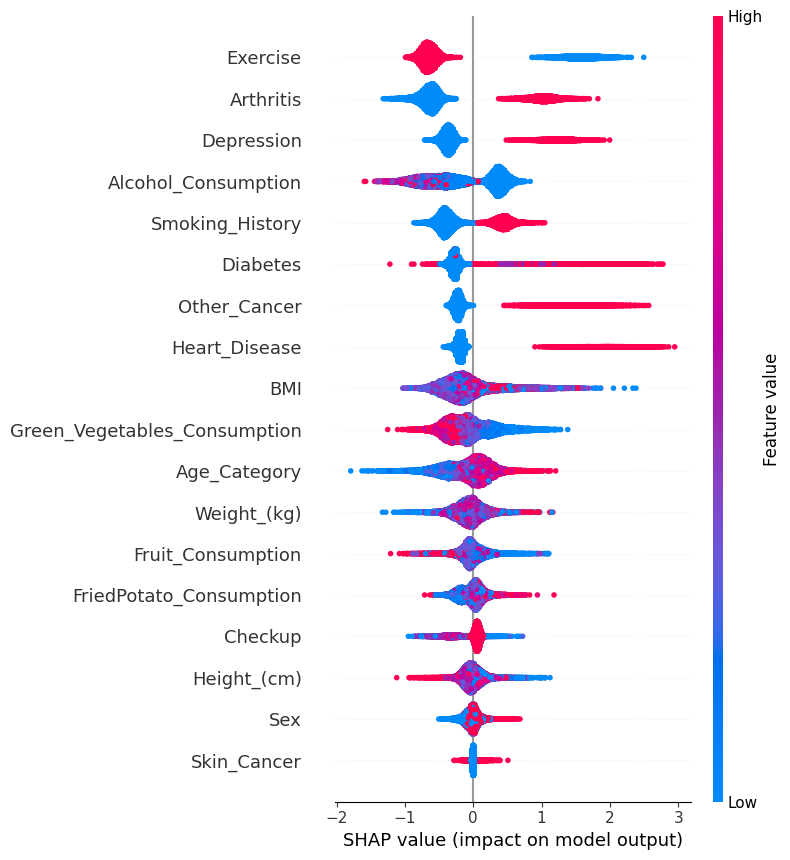

In [125]:
# plot summary plot
shap.summary_plot(shap_values_xgb, X_test_df, feature_names=X.columns)


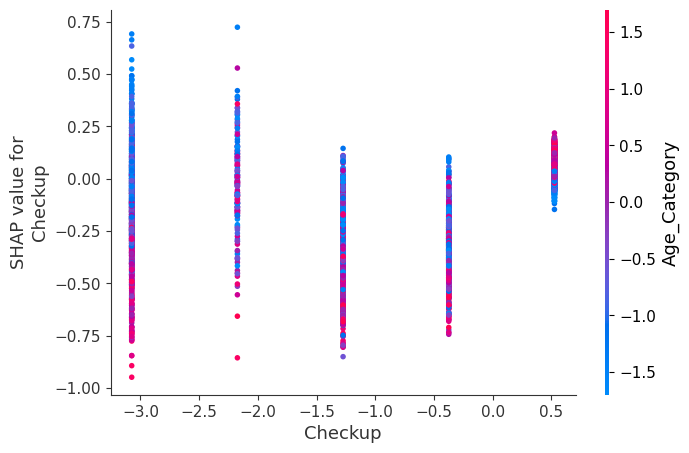

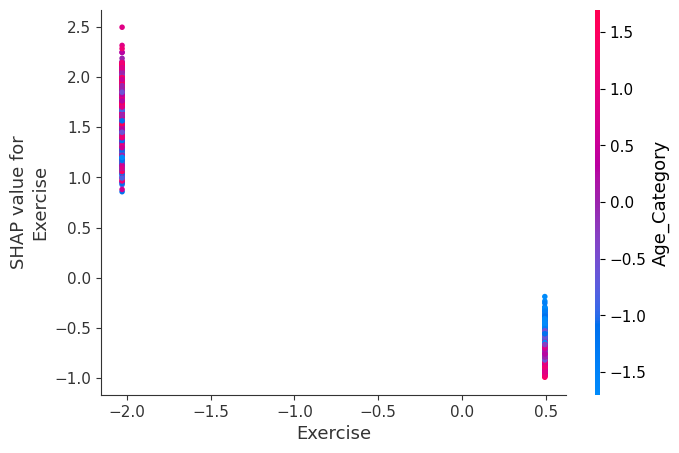

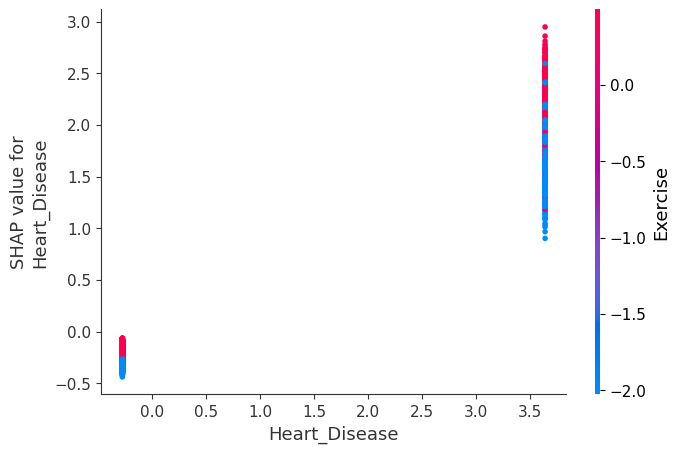

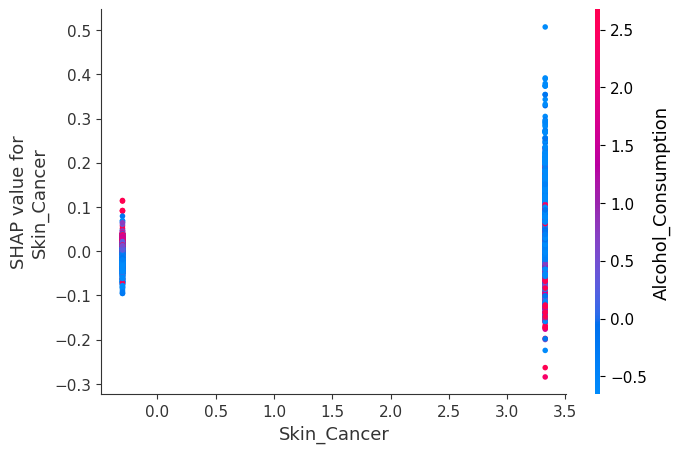

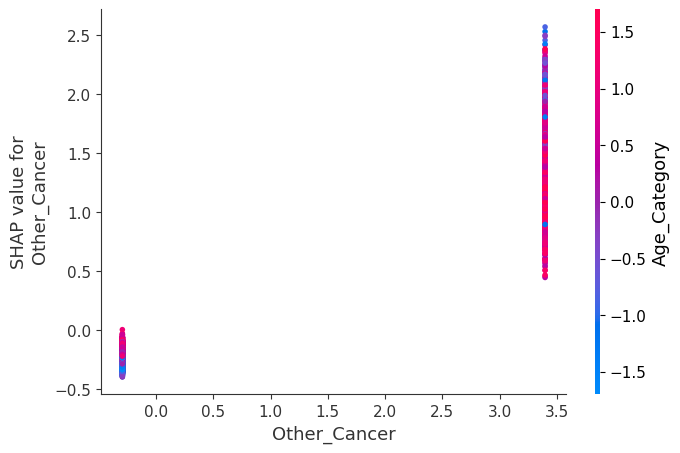

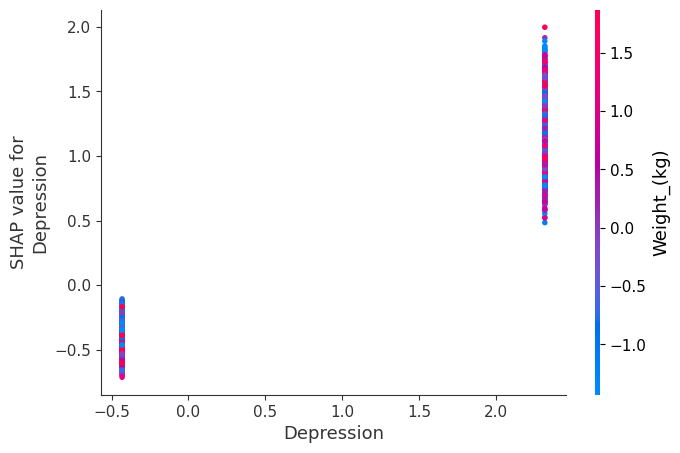

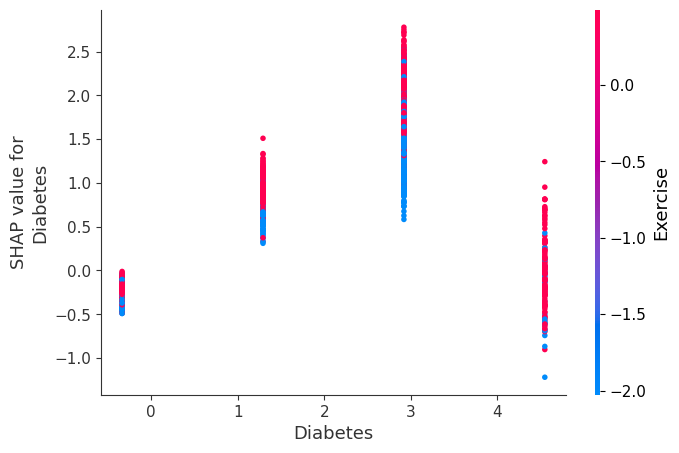

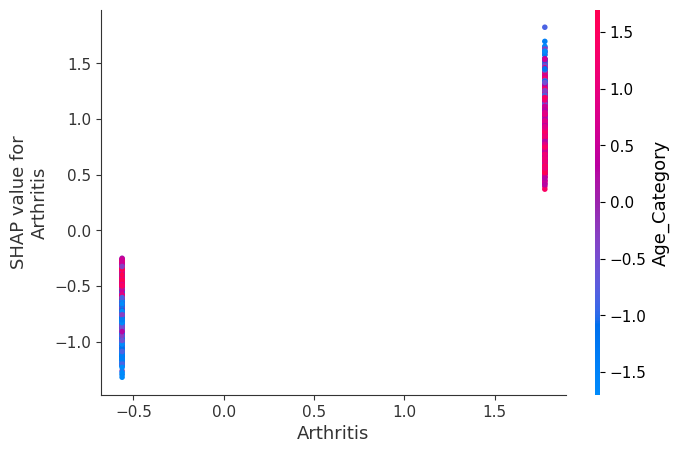

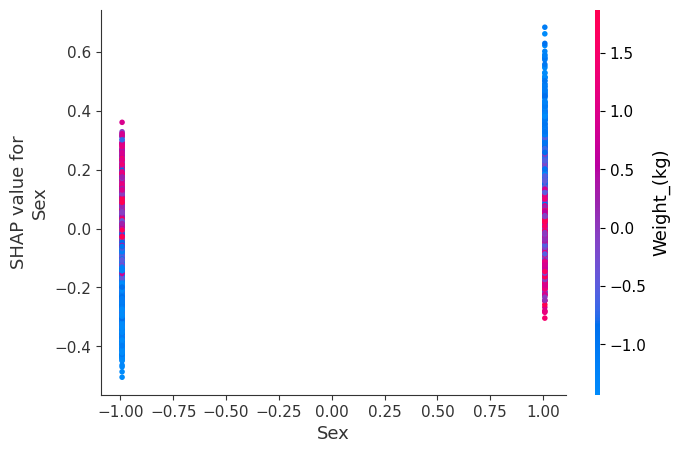

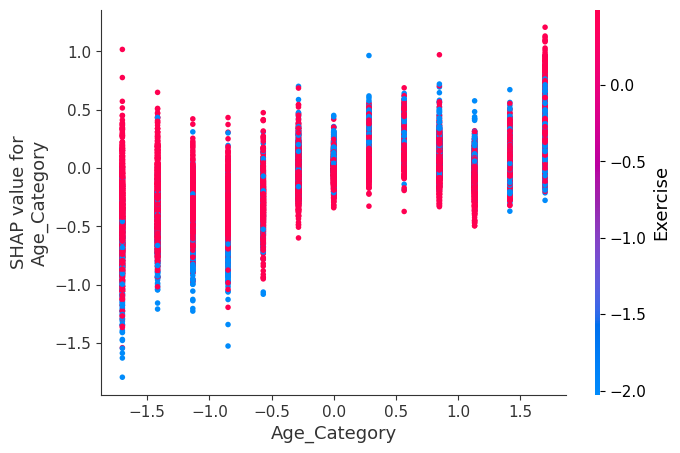

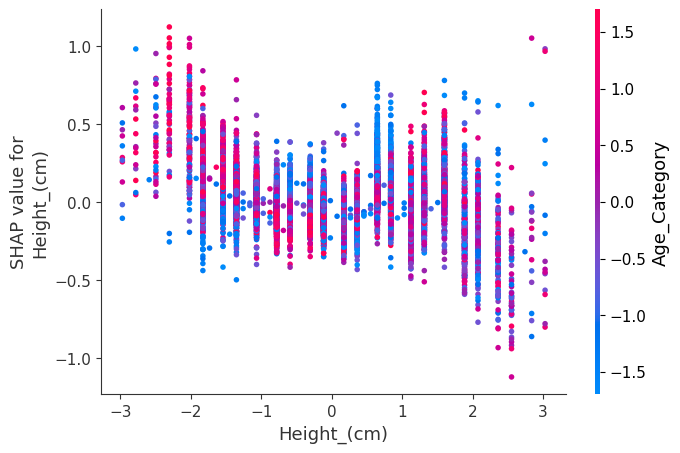

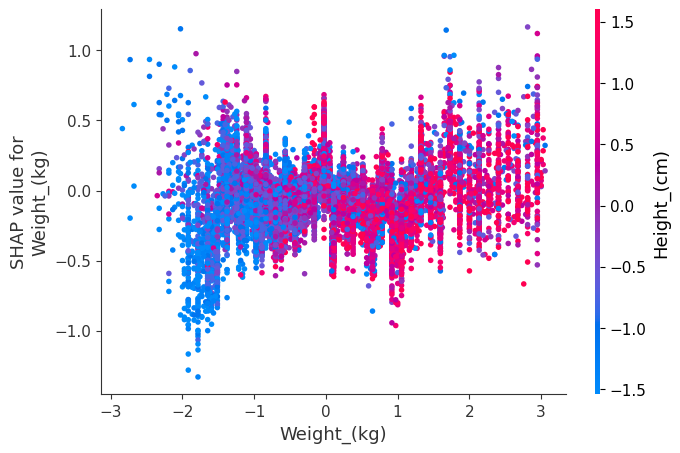

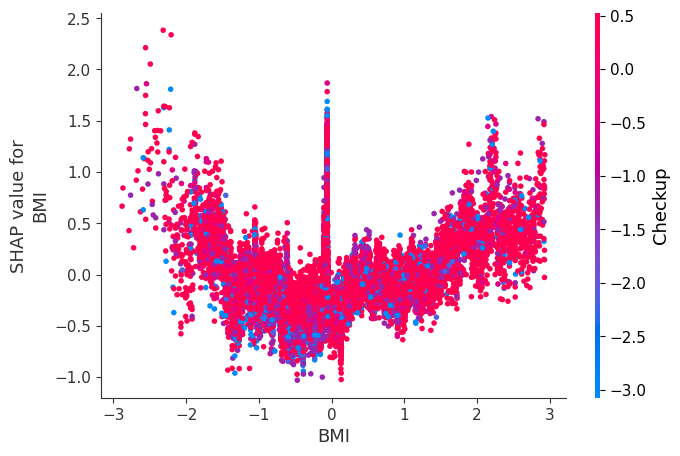

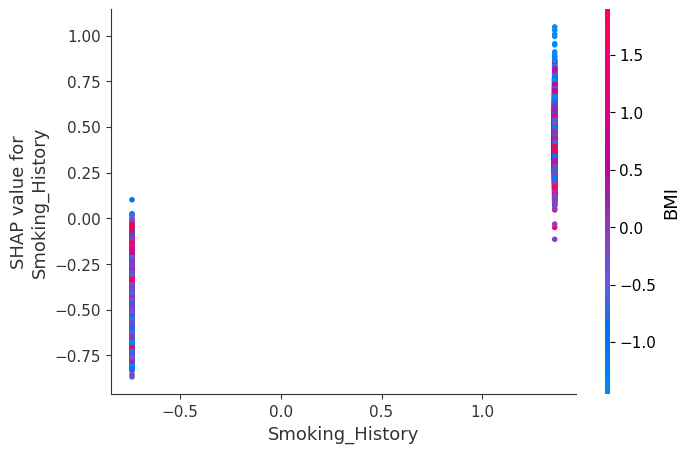

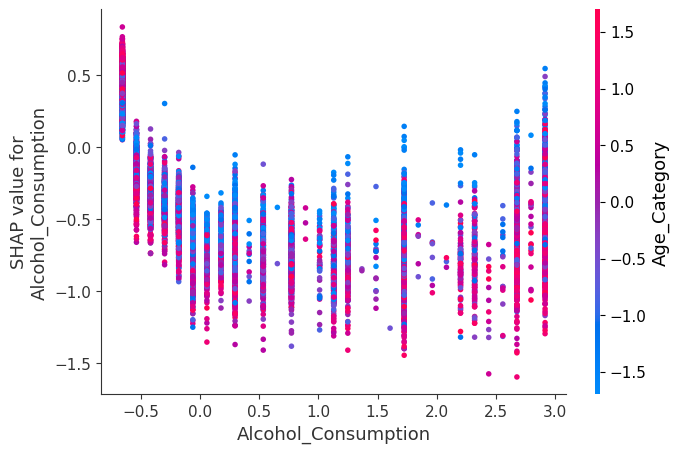

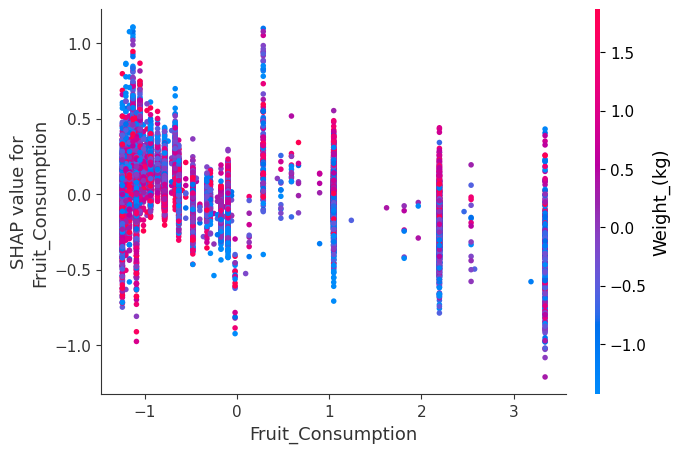

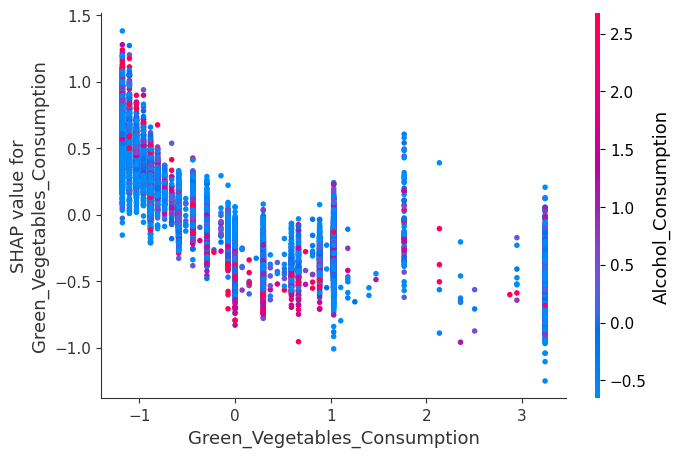

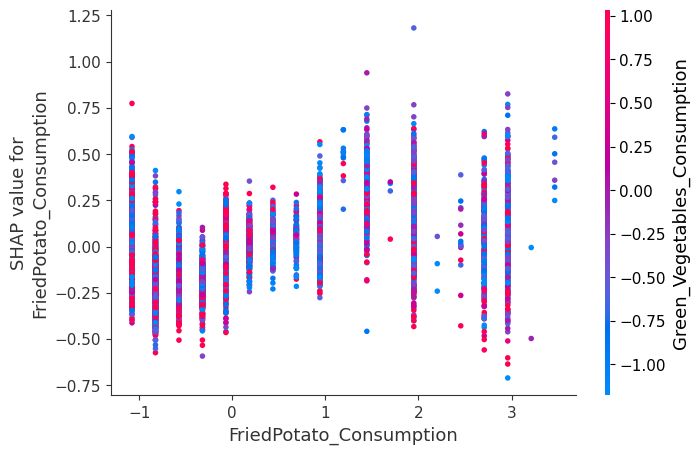

In [126]:
# create dependence plot
for feature_name in X.columns:
    shap.dependence_plot(feature_name, shap_values_xgb, X_test_df, feature_names=X.columns)

In [127]:
# visualize force plot
shap.initjs()
shap.force_plot(explainer_xgb.expected_value, shap_values_xgb[0], X_test_df.iloc[0,:], feature_names=X.columns)


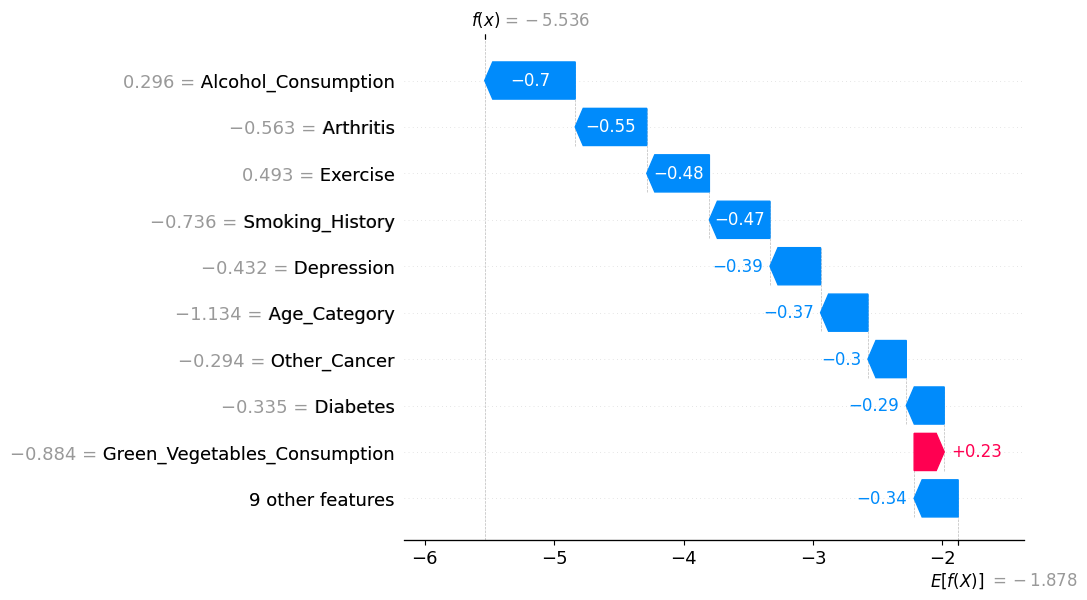

In [128]:
# create waterfall plot
shap.waterfall_plot(shap.Explanation(values=shap_values_xgb[0],
                                     base_values=explainer_xgb.expected_value,
                                     data=X_test_df.iloc[0,:], feature_names=X.columns))

CATBOOST

In [129]:
# compute SHAP values for CatBoost
explainer_catboost = shap.TreeExplainer(catboost_model)
shap_values_catboost = explainer_catboost.shap_values(X_test_df)

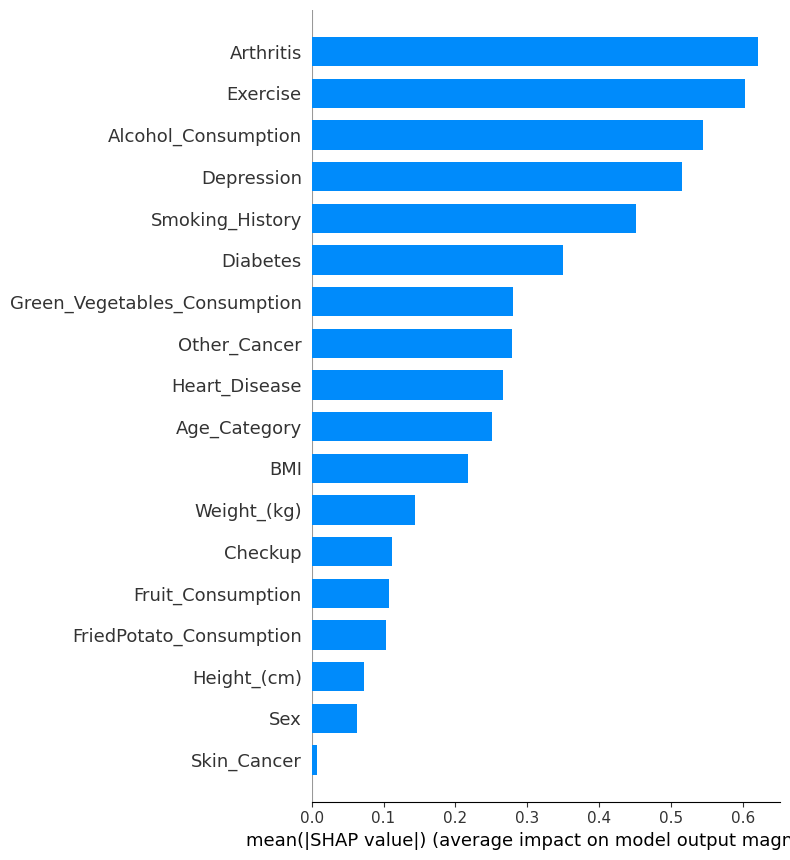

In [130]:
shap.summary_plot(shap_values_catboost, X_test_df, plot_type="bar", feature_names=X.columns)


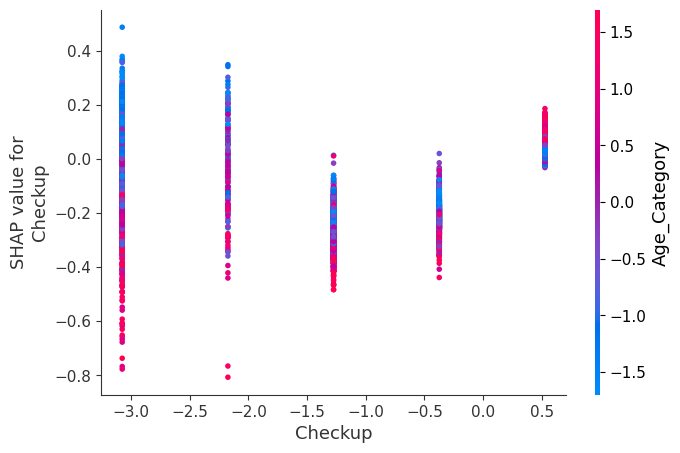

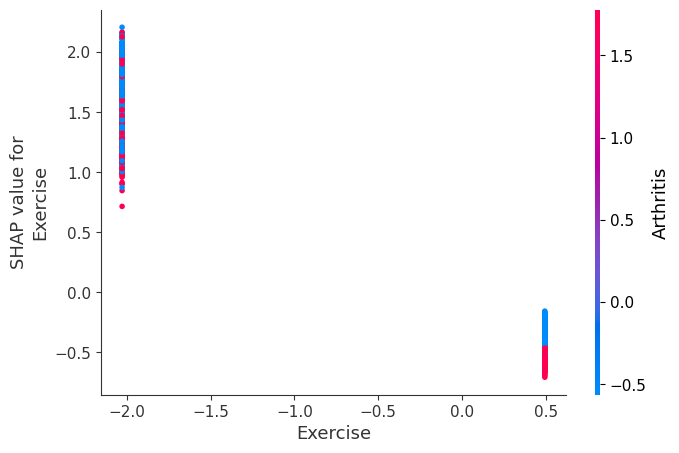

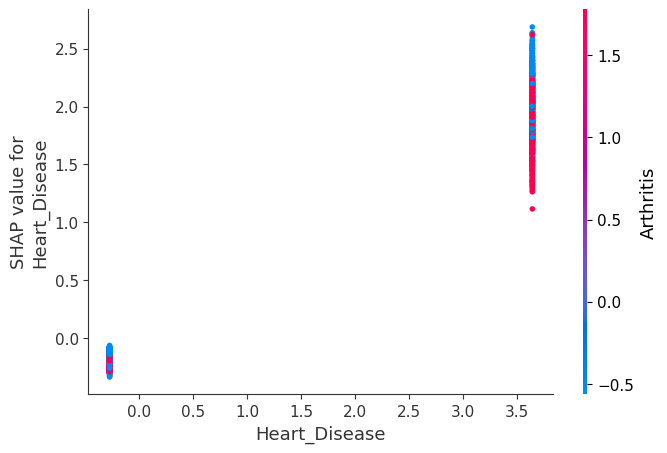

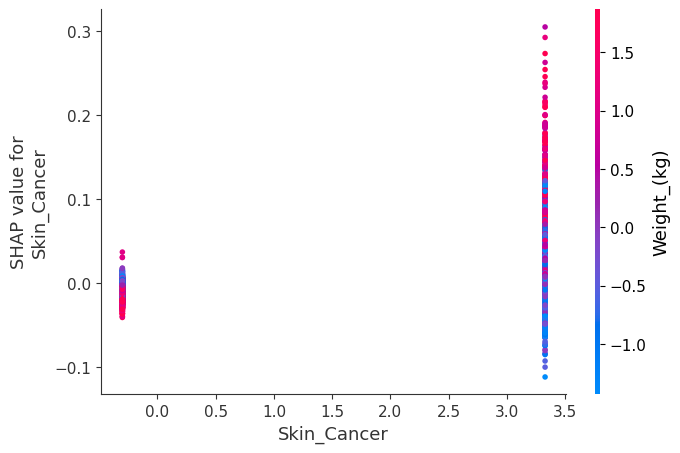

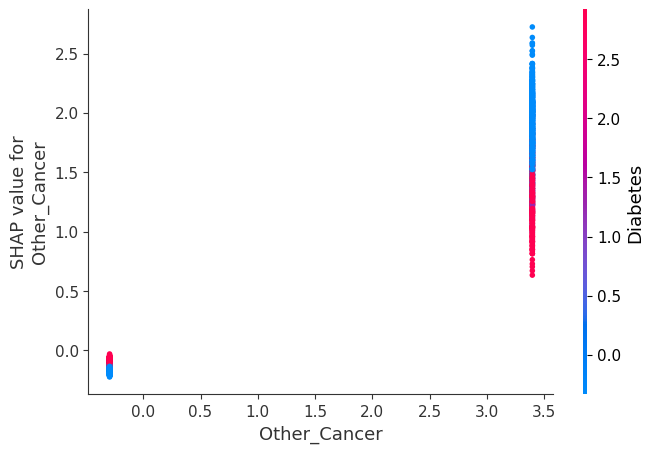

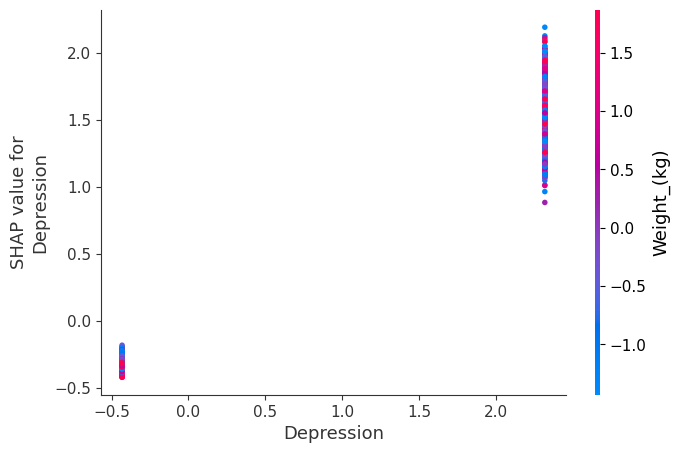

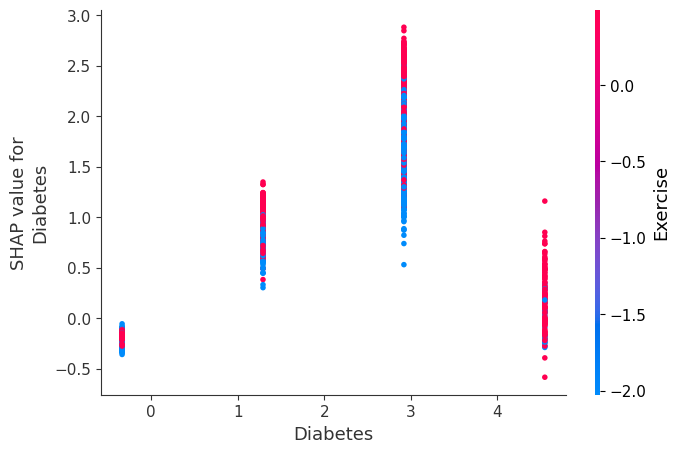

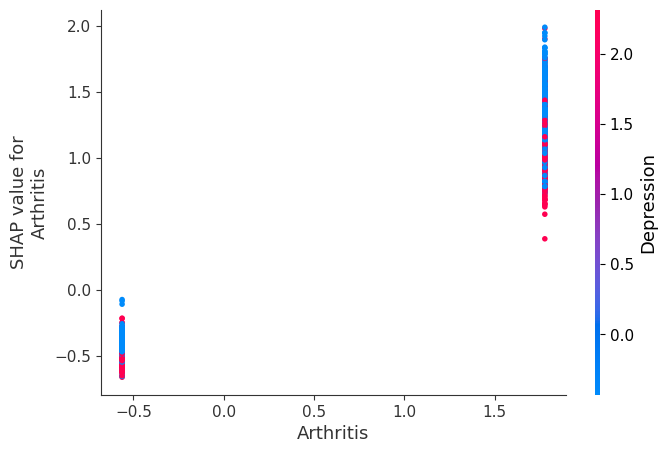

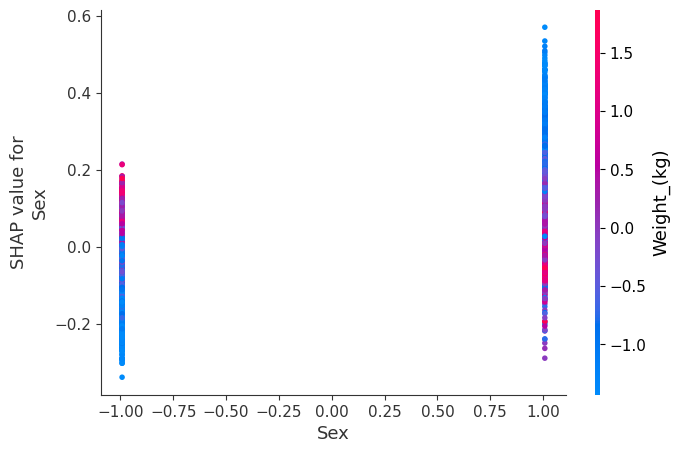

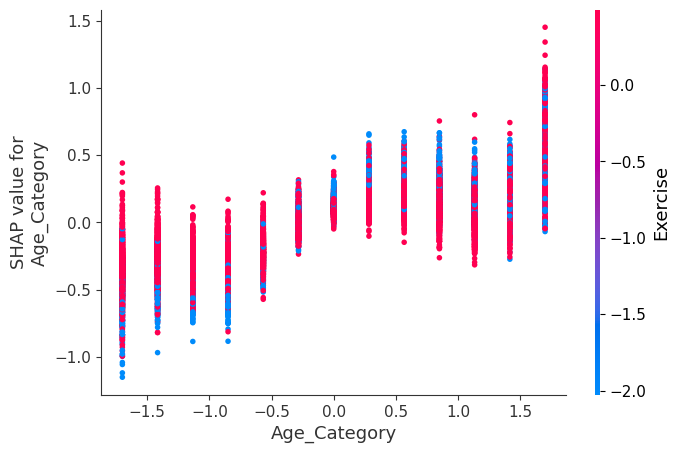

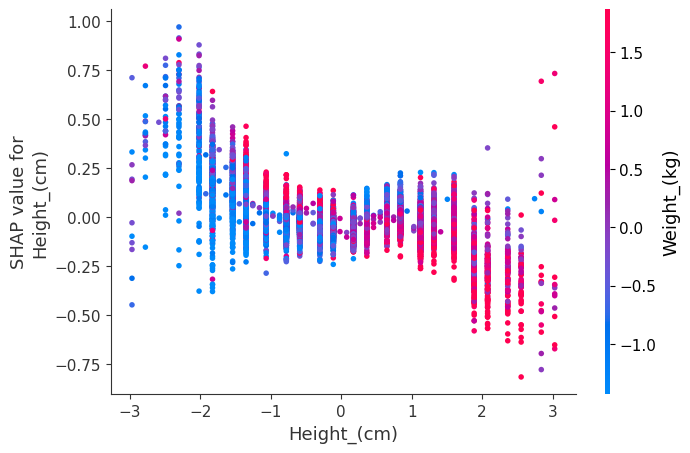

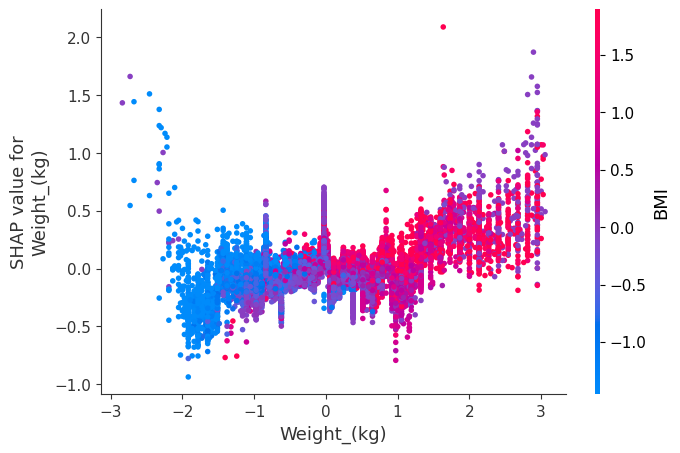

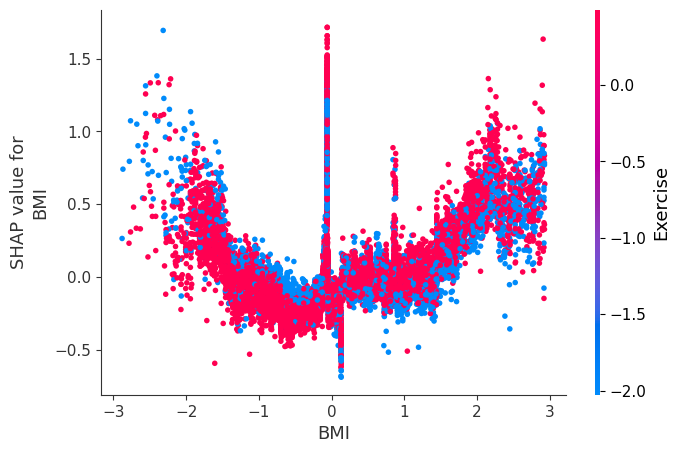

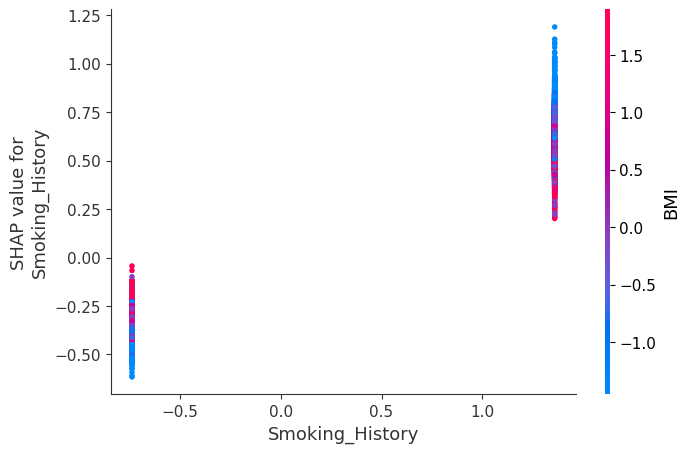

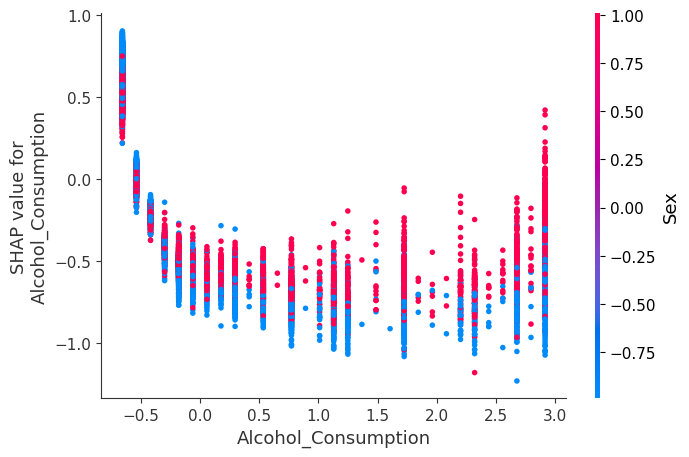

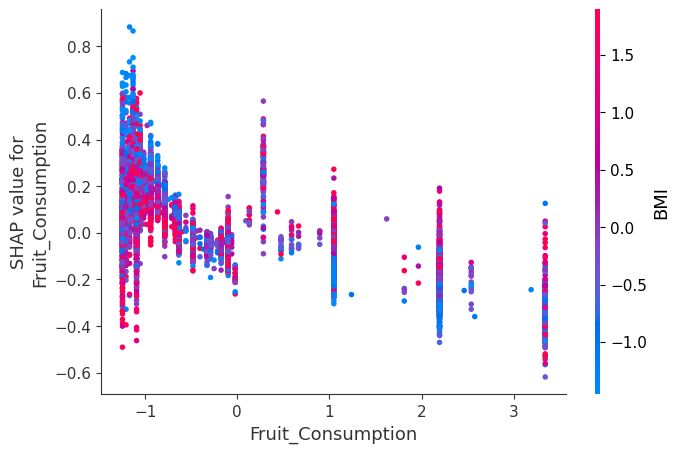

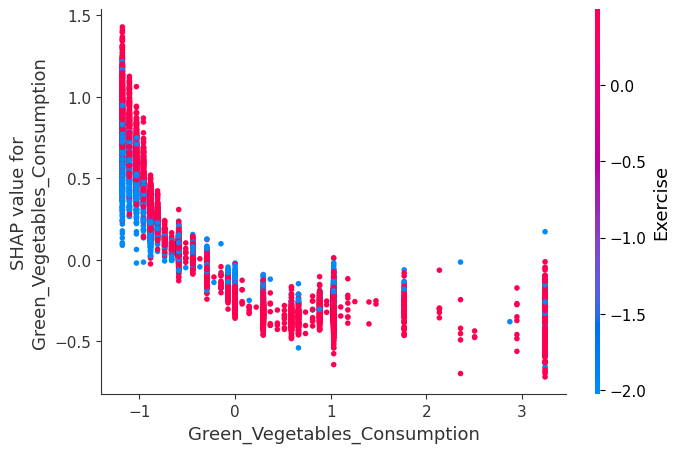

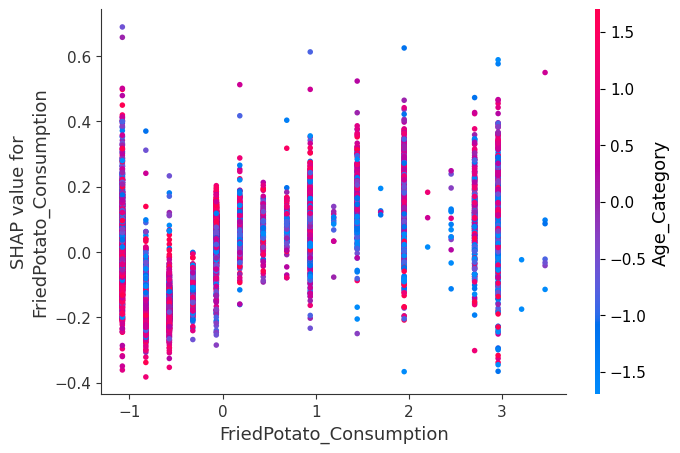

In [131]:
# create dependence plot for CatBoost
for feature_name in X.columns:
    shap.dependence_plot(feature_name, shap_values_catboost, X_test_df, feature_names=X.columns)


In [132]:
# visualize force plot for CatBoost
shap.initjs()
shap.force_plot(explainer_catboost.expected_value, shap_values_catboost[0], X_test_df.iloc[0,:], feature_names=X.columns)


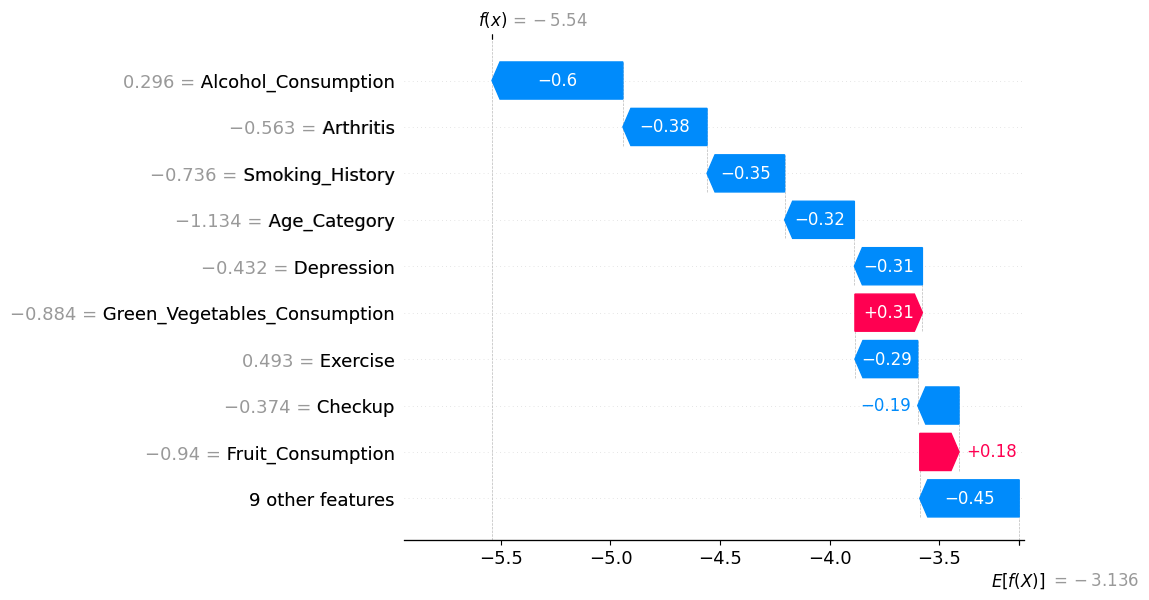

In [133]:
# create waterfall plot for CatBoost
shap.waterfall_plot(shap.Explanation(values=shap_values_catboost[0],
                                     base_values=explainer_catboost.expected_value,
                                     data=X_test_df.iloc[0,:], feature_names=X.columns))

DECISION TREE

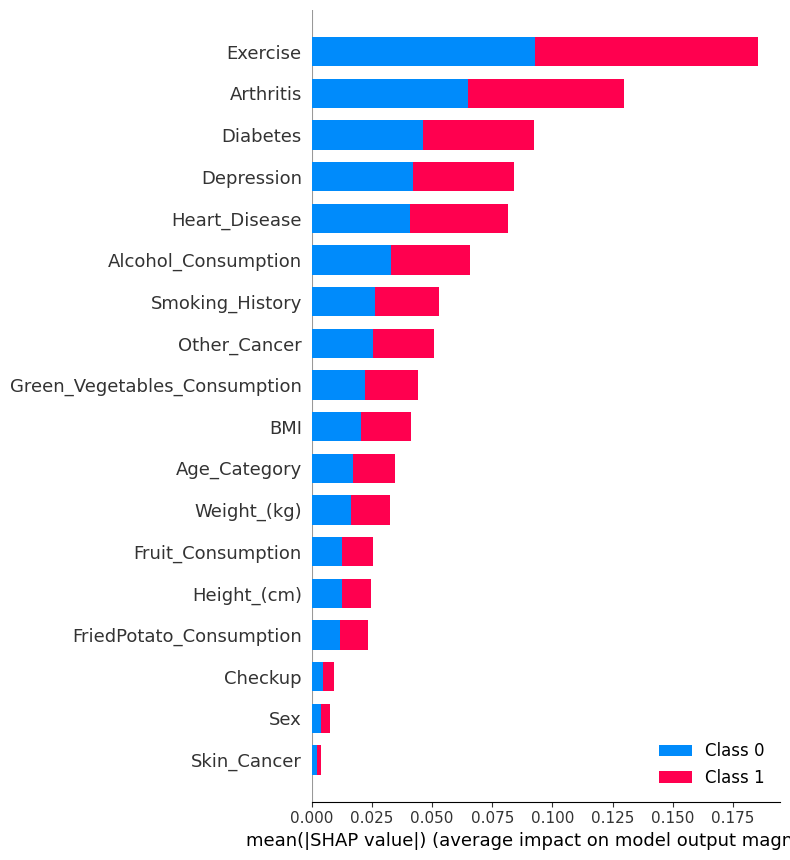

In [134]:
# Compute SHAP values for Decision Tree
explainer_dt = shap.TreeExplainer(dt_model)
shap_values_dt = explainer_dt.shap_values(X_test_df)

shap.summary_plot(shap_values_dt, X_test_df, plot_type="bar", feature_names=X.columns)


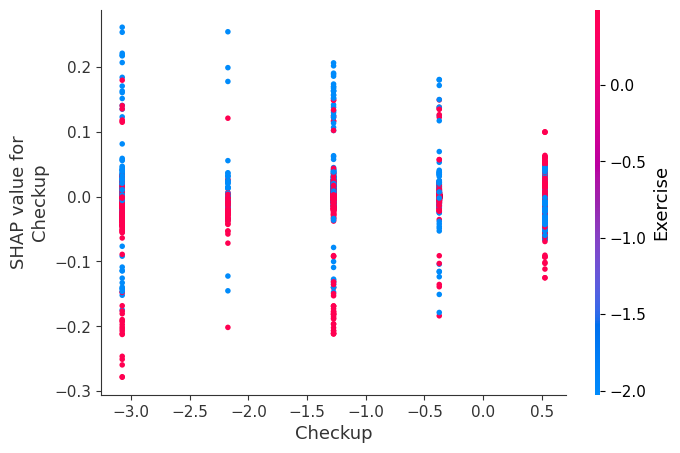

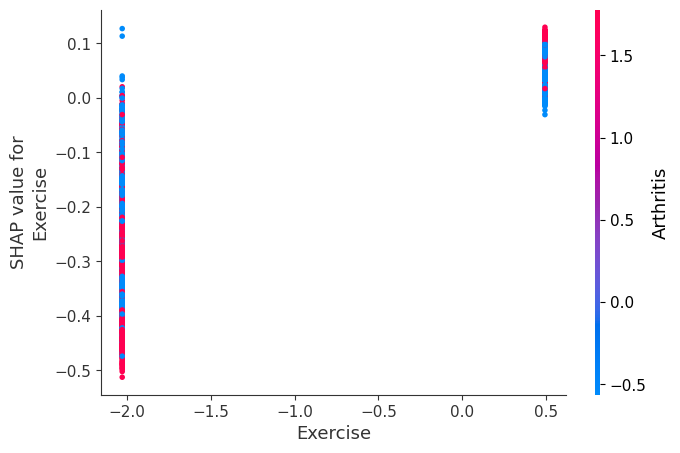

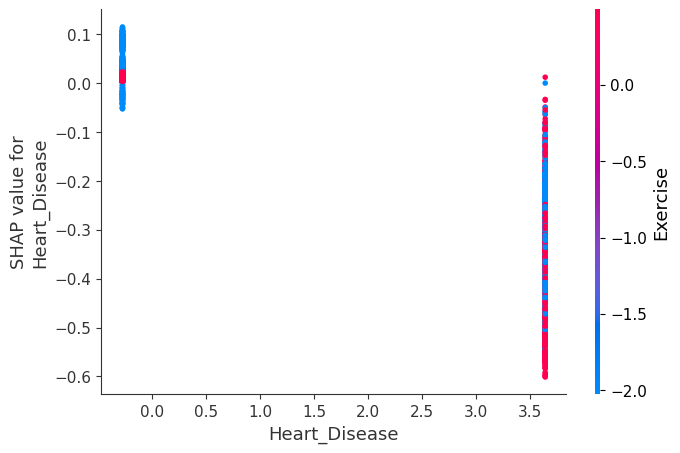

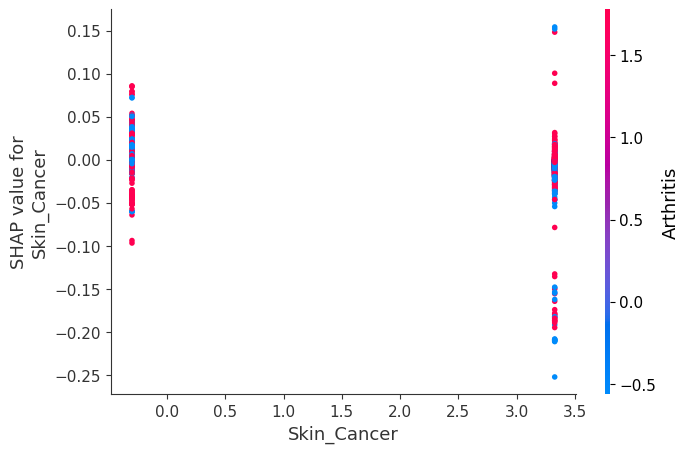

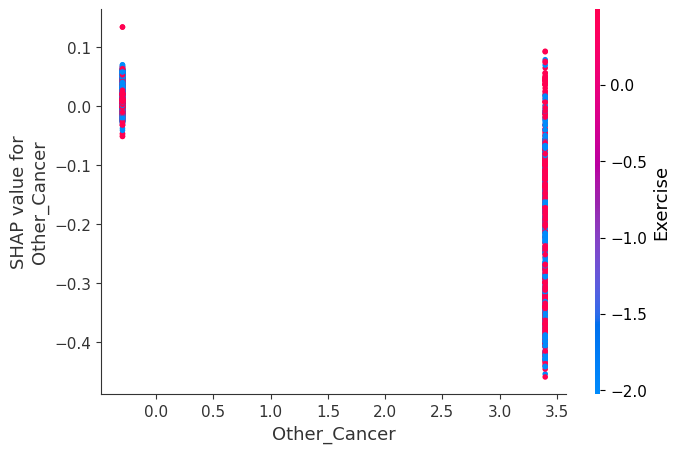

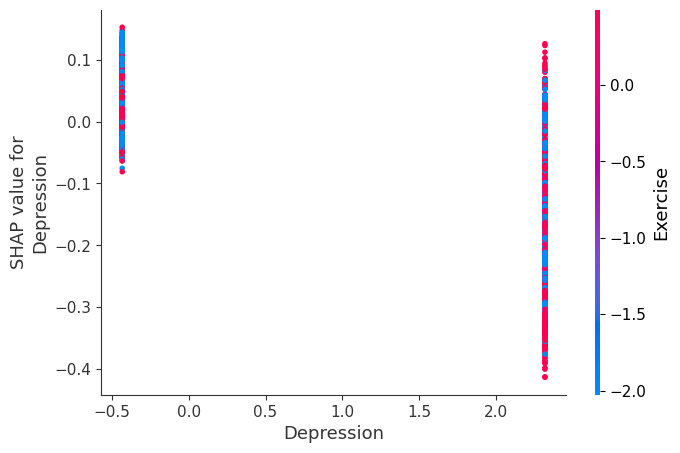

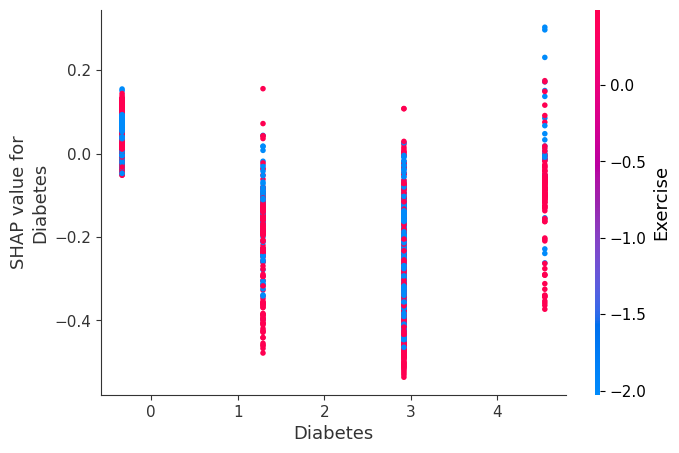

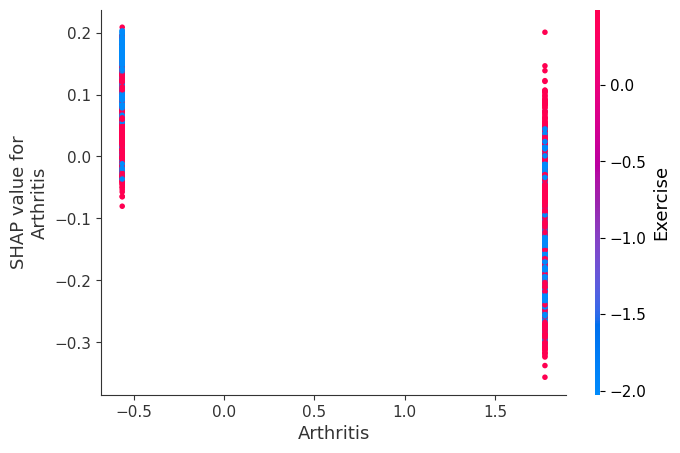

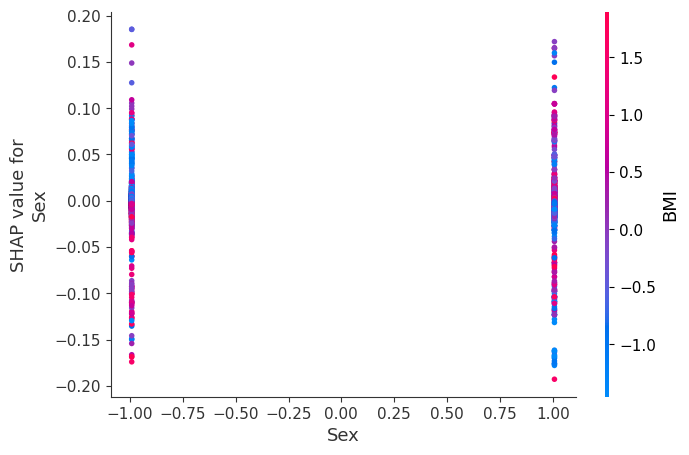

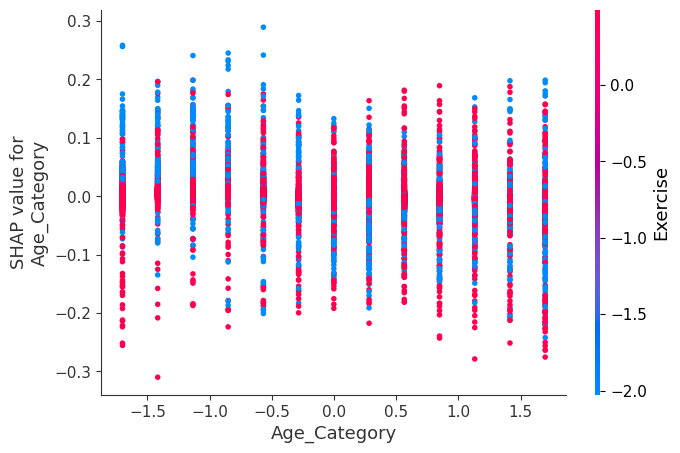

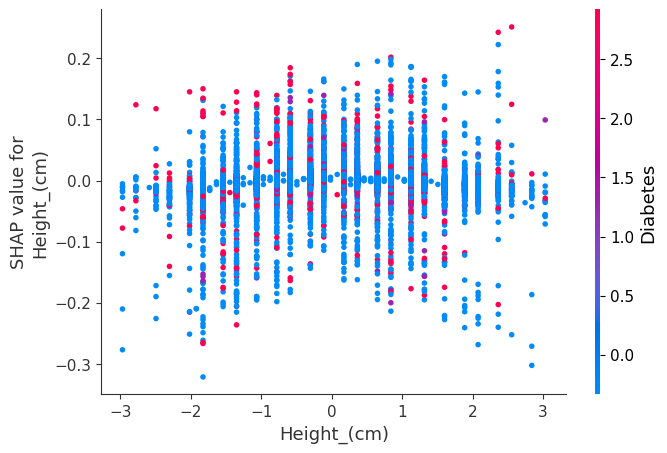

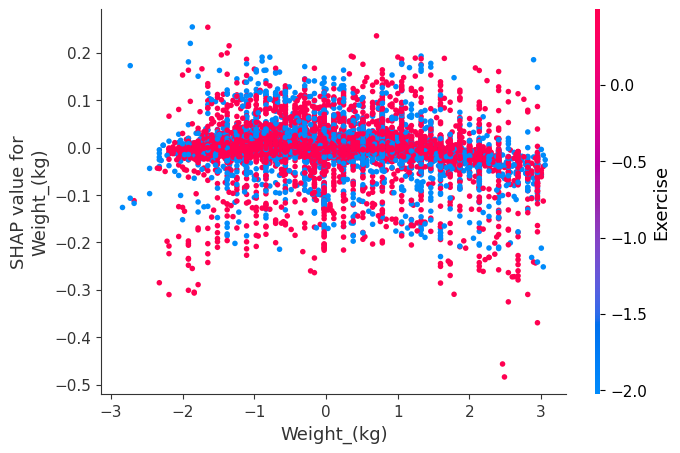

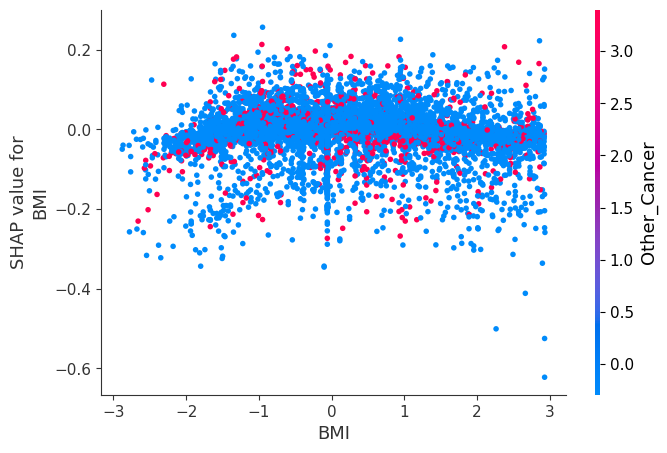

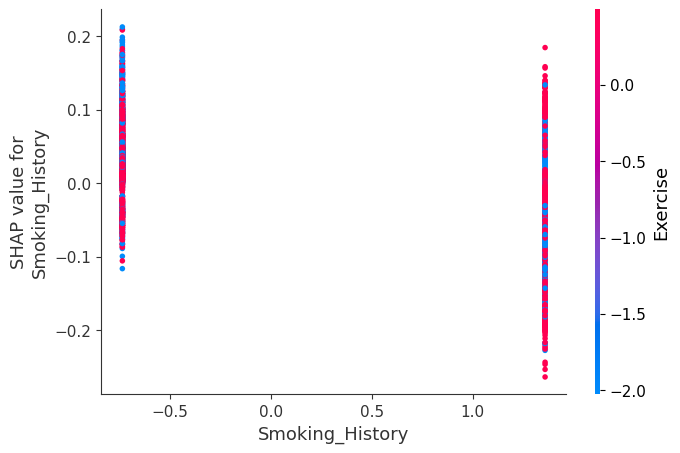

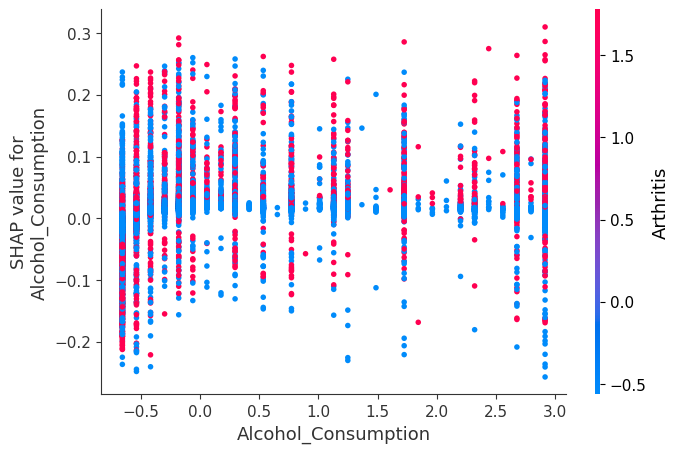

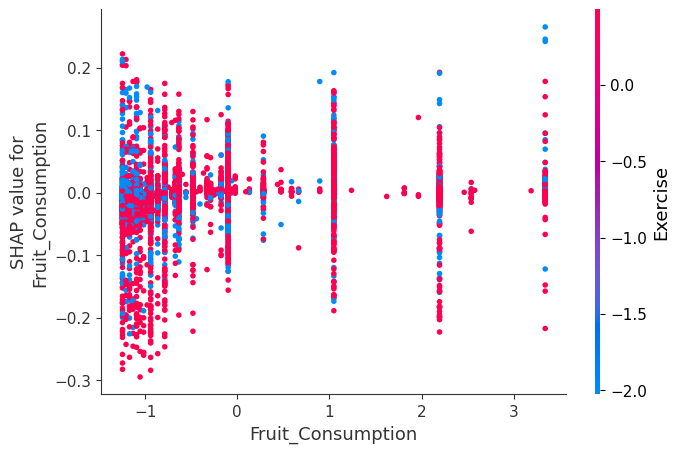

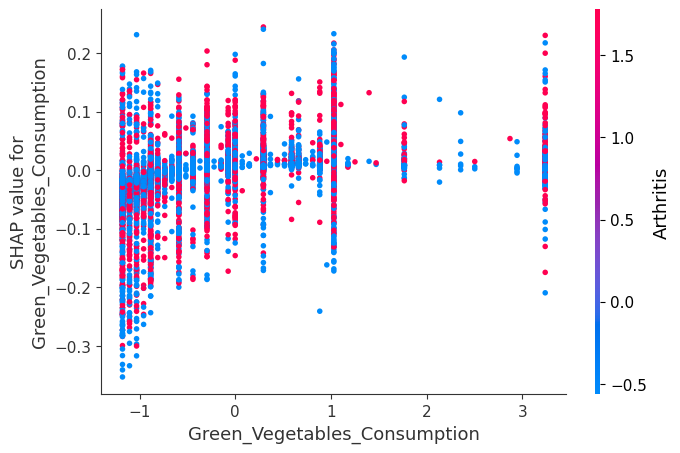

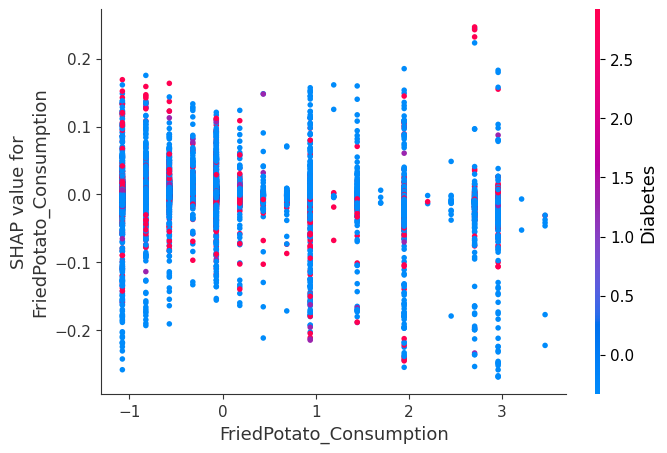

In [135]:
# Create dependence plot for Decision Tree
for feature_name in X.columns:
    shap.dependence_plot(feature_name, shap_values_dt[0], X_test_df, feature_names=X.columns)
